In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Iris

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

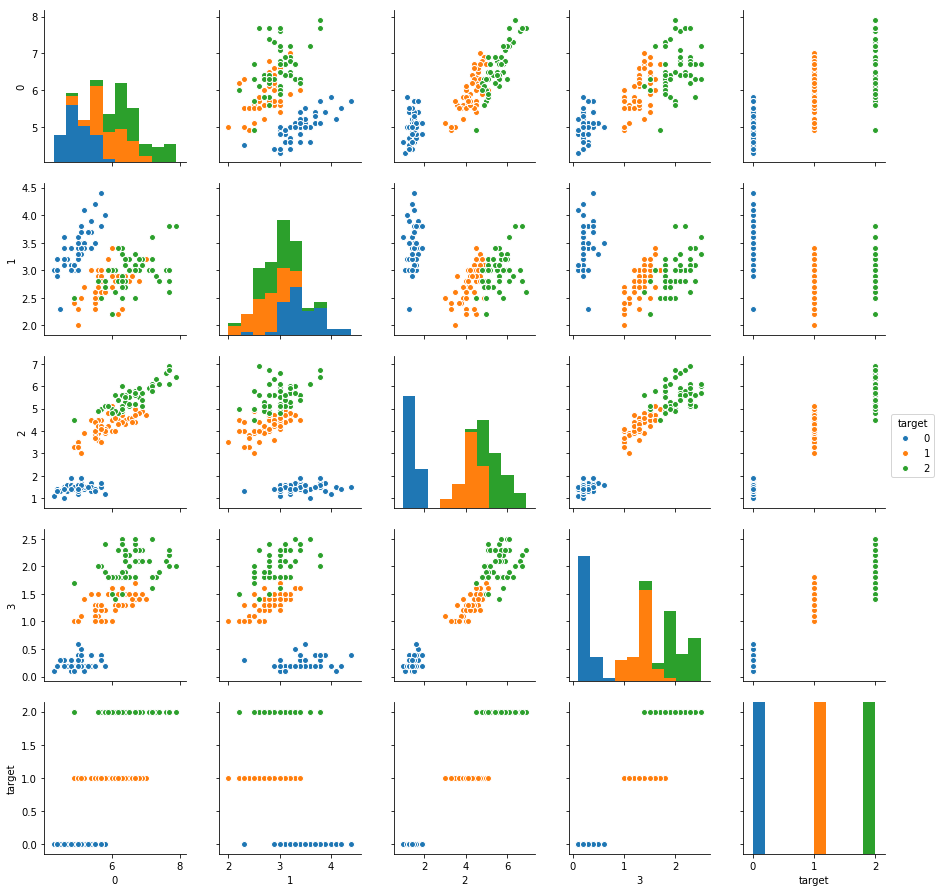

In [21]:
iris_df = pd.DataFrame(iris.data)
iris_df['target'] = iris.target
sns.pairplot(iris_df, hue='target')

In [7]:
km = KMeans(n_clusters=3)
iris_km = km.fit(iris.data)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_km.labels_, iris.target)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

In [11]:
gmm = GaussianMixture(n_components=3)
iris_gmm = gmm.fit(iris.data)

In [12]:
confusion_matrix(iris_gmm.predict(iris.data), iris.target)

array([[ 0, 45,  0],
       [50,  0,  0],
       [ 0,  5, 50]])

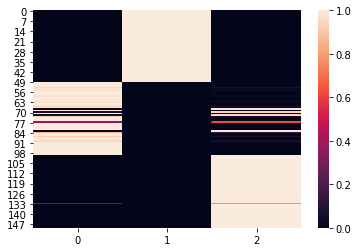

In [13]:
sns.heatmap(iris_gmm.predict_proba(iris.data))

## Digits

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


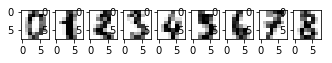

In [40]:
for i in range(1,10):
    plt.subplot(1,10,i)
    plt.imshow(digits.images[i-1], cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [41]:
gmm = GaussianMixture(n_components=10)
digits_gmm = gmm.fit(digits.data)

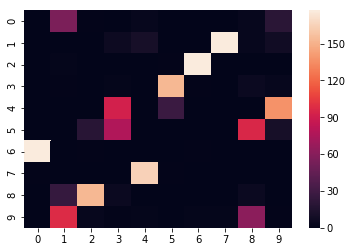

In [43]:
sns.heatmap(confusion_matrix(digits_gmm.predict(digits.data), digits.target))

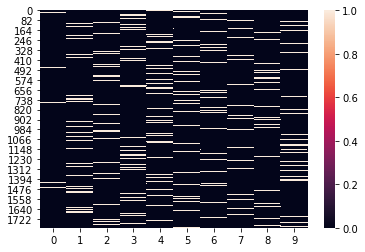

In [44]:
sns.heatmap(digits_gmm.predict_proba(digits.data))

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
digits_pca

array([[ -1.25946802,  21.27488364],
       [  7.95761094, -20.76869843],
       [  6.99192489,  -9.9559869 ],
       ...,
       [ 10.80128358,  -6.96025255],
       [ -4.87209939,  12.42395449],
       [ -0.34438898,   6.36554845]])

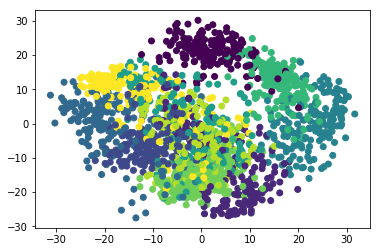

In [47]:
plt.scatter(digits_pca[:,0], digits_pca[:,1], c=digits.target)

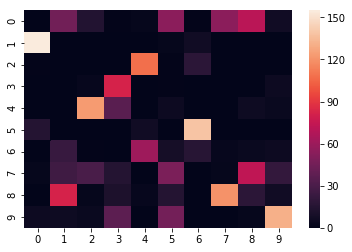

In [49]:
digitspca_gmm = gmm.fit(digits_pca)
sns.heatmap(confusion_matrix(digitspca_gmm.predict(digits_pca), digits.target))

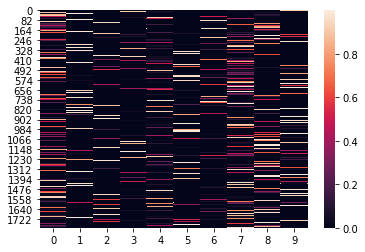

In [50]:
sns.heatmap(digitspca_gmm.predict_proba(digits_pca))

## 20Newsgroup

In [51]:
from sklearn.datasets import twenty_newsgroups
twenty_newsgroups.fetch_20newsgroups_vectorized()['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [56]:
ng20 = twenty_newsgroups.fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'comp.graphics', 'comp.windows.x'], remove=['headers','footers','quotes'])
len(ng20.data)

1774

In [63]:
print(ng20.data[3], "\n\n", ng20.target_names[ng20.target[0]])



I too would like a 3D graphics library!  How much do C libraries cost
anyway?  Can you get the tools used by, say, RenderMan, and can you get
them at a reasonable cost?

Sorry that I don't have any answers, just questions... 

 comp.windows.x


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english', max_df=0.95)
ng20_occur = count_vect.fit_transform(ng20.data)

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(ng20_occur)
ng20_tfidf = tf_transformer.transform(ng20_occur)

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
nb = GaussianNB()
scores = cross_val_score(nb, ng20_tfidf.toarray(), ng20.target, cv=5)
scores

array([0.84550562, 0.83707865, 0.84507042, 0.8559322 , 0.83002833])

In [69]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, max_iter=1000)
ng20_km = km.fit(ng20_tfidf)

In [70]:
confusion_matrix(ng20_km.labels_, ng20.target)

array([[  6, 126,   0],
       [  2,   1, 382],
       [576, 466, 215]])

In [71]:
gmm = GaussianMixture(n_components=3)
ng20_gmm = gmm.fit(ng20_tfidf.toarray())

In [74]:
ng20_gmm_label = ng20_gmm.predict(ng20_tfidf.toarray())
confusion_matrix(ng20_gmm_label, ng20.target)

array([[470, 191, 164],
       [100, 396,   0],
       [ 14,   6, 433]])

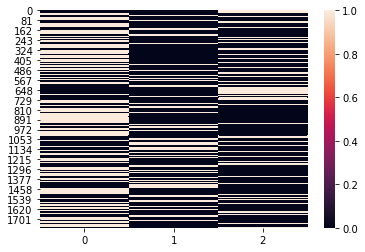

In [75]:
gmm_pred = ng20_gmm.predict_proba(ng20_tfidf.toarray())
sns.heatmap(gmm_pred)

*For your homework, consider performing PCA prior to GMM and analyse the posterior*